In [2]:
import numpy as np
import pandas as pd
import sys, os
import seaborn as sns
import viz.display as dp
from IPython.display import clear_output
from sklearn.preprocessing import StandardScaler

### Load Data

In [3]:
raw = pd.read_csv('D:/TickData_Agg/EURUSD.csv')

In [4]:
raw.head()

,Datetime,Open,High,Low,Close,Volume
0,2009-05-01 00:00:00,1.324435,1.324645,1.324430,1.324645,554.982980
1,2009-05-01 00:03:00,1.324685,1.325350,1.324685,1.324925,400.169775
2,2009-05-01 00:06:00,1.324915,1.325370,1.324895,1.325305,239.854325
3,2009-05-01 00:09:00,1.325335,1.326040,1.324825,1.325410,702.527180
4,2009-05-01 00:12:00,1.325345,1.325725,1.324680,1.324715,288.898580


### Get Open-Close Change

In [5]:
raw['Change'] = (raw.Close - raw.Open) / raw.Open
df = raw
window=20

### Get Rolling Mean and STD of Closing Prices

In [6]:
df['STD'] = df.Change.rolling(window=window, min_periods=1).std()
df['Vol'] = df.STD/np.sqrt(window)
df['Mean'] = df.Change.rolling(window=window, min_periods=1).mean()
df['Median'] = df.Change.rolling(window=window, min_periods=1).median()
df['Skew'] = df.Change.rolling(window=window, min_periods=1).skew()
## Not excess kurtosis
df['Kurtosis'] = df.Change.rolling(window=window, min_periods=1).kurt()
df['Gaussness'] = abs(df.Mean-df.Median)

In [7]:
df['Gaussness'] = StandardScaler().fit_transform(df.Gaussness.values.reshape(-1, 1))

In [8]:
df.Gaussness.describe()

count    1.626964e+06
mean    -6.680909e-16
std      1.000000e+00
min     -5.808108e-01
25%     -5.808108e-01
50%     -3.088572e-01
75%      2.075550e-01
max      9.746723e+01
Name: Gaussness, dtype: float64

### Extract all signal candles

In [9]:
cutoff = 3
longs = df[df.Change > cutoff*df.STD + df.Mean]
longs = longs[longs.STD != 0]
shorts = df[df.Change < df.Mean - cutoff*df.STD]
shorts = shorts[shorts.STD != 0]

In [10]:
'Num Longs', longs.shape[0]

('Num Longs', 4035)

In [11]:
'Num Shorts', shorts.shape[0]

('Num Shorts', 3832)

In [12]:
longs.describe()

,Open,High,Low,Close,Volume,Change,STD,Vol,Mean,Median,Skew,Kurtosis,Gaussness
count,4035.000000,4035.000000,4035.000000,4035.000000,4035.000000,4035.000000,4.035000e+03,4.035000e+03,4035.000000,4035.000000,4035.000000,4035.000000,4035.000000
mean,1.260410,1.261788,1.260330,1.261570,1494.510467,0.000925,2.571362e-04,5.749740e-05,0.000035,-0.000006,2.305774,8.095552,0.580238
std,0.117799,0.117864,0.117807,0.117861,1901.084788,0.000923,2.325885e-04,5.200837e-05,0.000129,0.000120,0.953414,4.805006,1.431508
min,1.039140,1.040065,1.039040,1.039995,0.000000,-0.000479,7.930444e-07,1.773301e-07,-0.003085,-0.003275,0.000092,-7.883751,-0.580810
25%,1.141090,1.143007,1.141000,1.142832,340.083128,0.000367,1.099692e-04,2.458985e-05,0.000006,-0.000016,1.596604,4.542969,-0.265567
50%,1.288485,1.290115,1.288350,1.290035,870.480130,0.000691,1.974435e-04,4.414971e-05,0.000036,0.000004,2.007480,6.298396,0.148548
75%,1.356428,1.357752,1.356380,1.357442,1873.278502,0.001219,3.401445e-04,7.605863e-05,0.000080,0.000031,2.836288,10.020699,0.917881
max,1.510910,1.514290,1.510910,1.513560,20403.297030,0.016507,3.748538e-03,8.381986e-04,0.001175,0.001121,4.473463,20.462439,26.809413


In [13]:
shorts.head()

,Datetime,Open,High,Low,Close,Volume,Change,STD,Vol,Mean,Median,Skew,Kurtosis,Gaussness
220,2009-05-01 11:00:00,1.331355,1.331650,1.328055,1.328135,1043.83575,-0.002419,0.000747,0.000167,0.000103,0.000241,-2.060176,6.477463,3.167636
1382,2009-05-03 21:06:00,1.328000,1.328000,1.327750,1.328000,13.27911,0.000000,0.000042,0.000009,0.000179,0.000188,-4.472136,20.000000,-0.325105
1383,2009-05-03 21:09:00,1.327900,1.328000,1.327650,1.327750,15.93418,-0.000113,0.000078,0.000017,0.000164,0.000188,-3.178369,9.642362,0.084000
2195,2009-05-05 13:45:00,1.341545,1.341545,1.339300,1.339535,926.11915,-0.001498,0.000421,0.000094,-0.000133,-0.000082,-1.741245,4.980199,0.795579
2288,2009-05-05 18:24:00,1.333390,1.333420,1.330940,1.331350,829.78810,-0.001530,0.000471,0.000105,-0.000105,0.000030,-1.389514,3.458058,3.078793


### Visualize a Long and a Short

##### Long Candle / Short Signal

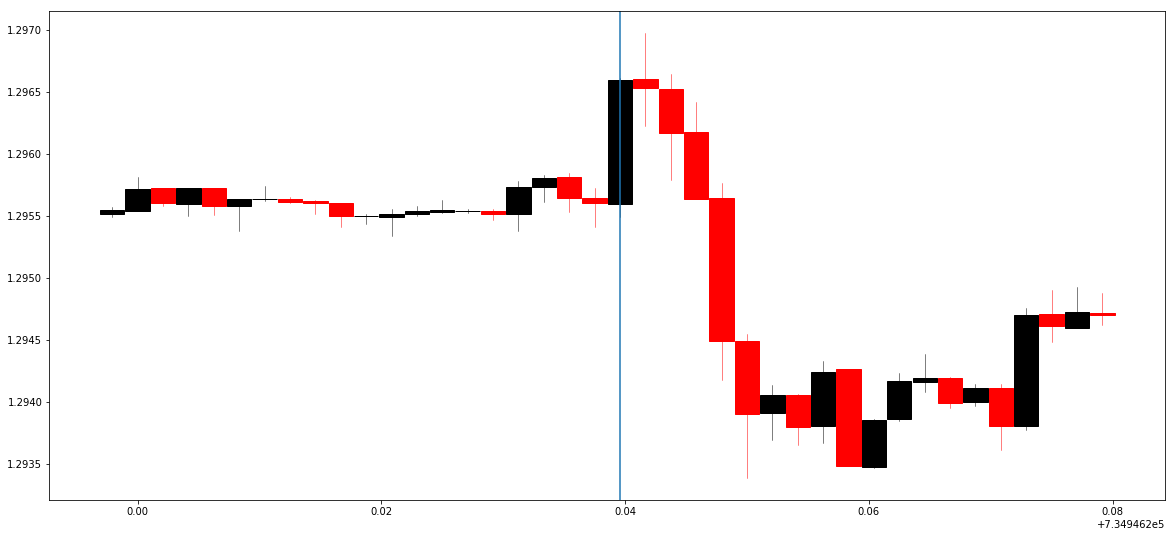

In [48]:
idx = df[df.Datetime == longs.Datetime.values[np.random.randint(0, longs.shape[0])]].index.values[0]
data = df.iloc[idx-window:idx+window, :].values
dp.simple_ohlc(data, window)

In [21]:
data[19, :]

array(['2015-08-31 00:00:00', 1.12114, 1.121235, 1.120735, 1.12076,
       510.0712300000003, -0.00033894072105182847, 0.0, 0.0,
       -0.0003389407210518307, -0.00033894072105182847, nan, nan,
       -0.5808108401370826], dtype=object)

##### Short Candle / Long Signal

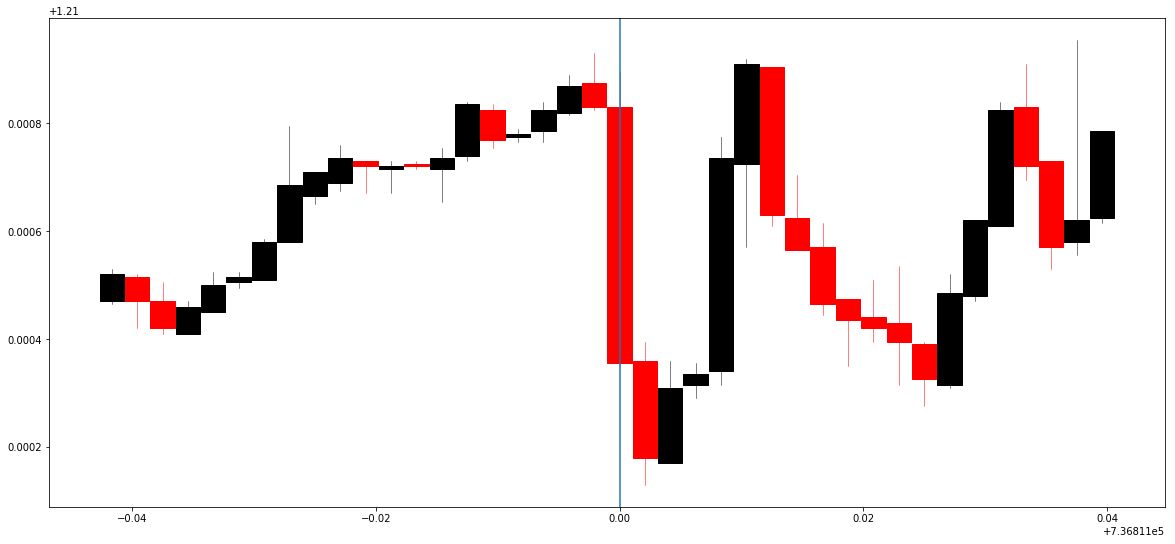

In [120]:
idx = df[df.Datetime == shorts.Datetime.values[np.random.randint(0, shorts.shape[0])]].index.values[0]
data = df.iloc[idx-window:idx+window, :].values
dp.simple_ohlc(data, window)

### Calculate Average TTC (Time-to-close)

##### Long Candle / Short Trade

In [121]:
def long_short_ttc(datetime, df):
    
    idx = df[df.Datetime == datetime].index.values[0]
    target = df.iloc[idx, :].Open
    close, low = np.inf, np.inf
    
    ctr = idx
    while close > target and low > target:
        idx += 1
        close = df.iloc[idx, :].Close
        low = df.iloc[idx, :].Low
        if idx - ctr >= 100:
            break
    return idx - ctr

##### Short Candle / Long Trade

In [122]:
def short_long_ttc(datetime, df):
    
    idx = df[df.Datetime == datetime].index.values[0]
    target = df.iloc[idx, :].Open
    close, high = -np.inf, -np.inf
    
    ctr = idx
    while close < target and high < target:
        idx += 1
        close = df.iloc[idx, :].Close
        low = df.iloc[idx, :].High
        if idx - ctr >= 100:
            break
    return idx - ctr

### Get Average Time-To-Close on Longs

In [ ]:
ttc_long = []
for i, datetime in enumerate(longs.Datetime):
    clear_output()
    print(i)
    ttc_long.append(long_short_ttc(datetime, df))

45


In [ ]:
ttc_longs = pd.DataFrame(ttc_long, columns=['TTC'])

In [ ]:
ttc_longs.TTC.describe()

### Get Average Time-To-Close on Shorts

In [102]:
ttc_short = []
for i, datetime in enumerate(shorts.Datetime):
    clear_output()
    print(i)
    ttc_short.append(short_long_ttc(datetime, df))

3831


In [103]:
ttc_shorts = pd.DataFrame(ttc_short, columns=['TTC'])

In [104]:
ttc_shorts.TTC.describe()

count    3832.000000
mean       46.841858
std        40.563938
min         1.000000
25%         9.000000
50%        30.000000
75%       100.000000
max       100.000000
Name: TTC, dtype: float64

In [105]:
np.quantile(ttc_short, 0.65)

73.0